In [3]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense,Dropout

import numpy as np
import matplotlib.pyplot as plt
from keras import utils
from keras.optimizers import Adam
from tensorflow.keras.models import load_model
from keras.datasets import cifar10
from keras.datasets import cifar100

Cifar10 Lenet Local test

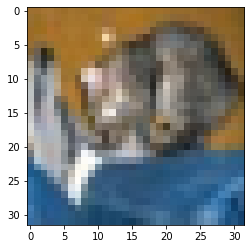

In [4]:
dataset1 = cifar10
(x_train1, y_train1), (x_test1, y_test1) = dataset1.load_data() #original size train(xxx, 28, 28),test(xxx)

img = x_test1[0] 
plt.imshow(img)


#translate the data to image
x_train1 = x_train1.astype("float32")
x_test1 = x_test1.astype("float32")


#normalization
x_train1 /= 255
x_test1 /= 255



lenet5_10 = load_model('Model/lenet5_cifar10.h5')#load lenet5 model trained with mnist dataset 
lenet5_10.compile(optimizer=Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy']) 

In [5]:
beta = 0.04057
N = 600
sample(x_test1[0],y_test1[0],lenet5_10,N,beta)


Sampled 769 images, 169 outside beta, 600 inside beta
600 images inside beta have the same label, local robustness formula satisfied
max safe distance: 0.04057


In [1]:
beta = 0.0382
N = 671
sample(x_test1[0],y_test1[0],lenet5_10,N,beta)

671 images inside beta have the same label, local robustness formula satisfied
max safe distance: 0.0382


In [2]:
beta = 0.0312
N = 783
sample(x_test1[0],y_test1[0],lenet5_10,N,beta)

783 images inside beta have the same label, local robustness formula satisfied
max safe distance: 0.0312


Cifar100 Lenet Local test

In [6]:
dataset2 = cifar100
(x_train2, y_train2), (x_test2, y_test2) = dataset2.load_data() #original size train(xxx, 28, 28),test(xxx)

img = x_test2[0]        
#translate the data to image
x_train2 = x_train2.astype("float32")
x_test2 = x_test2.astype("float32")


#normalization
x_train2 /= 255
x_test2 /= 255

lenet5_100 = load_model('Model/lenet5_cifar100.h5')#load lenet5 model trained with mnist dataset 
lenet5_100.compile(optimizer=Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy']) 



In [25]:
beta = 0.01980
N = 600
sample(x_test2[0],y_test2[0],lenet5_100,beta)

Beta is reduced by 0.0001, the new beta is 0.019700000000000002
Beta is reduced by 0.0001, the new beta is 0.019600000000000003
Beta is reduced by 0.0001, the new beta is 0.019500000000000003
Beta is reduced by 0.0001, the new beta is 0.019400000000000004
Beta is reduced by 0.0001, the new beta is 0.019300000000000005
Beta is reduced by 0.0001, the new beta is 0.019200000000000005
Beta is reduced by 0.0001, the new beta is 0.019100000000000006
Beta is reduced by 0.0001, the new beta is 0.019000000000000006
Beta is reduced by 0.0001, the new beta is 0.018900000000000007
Beta is reduced by 0.0001, the new beta is 0.018800000000000008
Beta is reduced by 0.0001, the new beta is 0.01870000000000001
Beta is reduced by 0.0001, the new beta is 0.01860000000000001
Beta is reduced by 0.0001, the new beta is 0.01850000000000001
Beta is reduced by 0.0001, the new beta is 0.01840000000000001
Beta is reduced by 0.0001, the new beta is 0.01830000000000001
Beta is reduced by 0.0001, the new beta is 0.

KeyboardInterrupt: 

In [24]:
def sample(x_test,y_test,model,N,beta):
    
    count = 0
    count2 = 0
    mean = np.zeros(3)  
    cov = np.eye(3)
    label = y_test
    
    while True:
        count2+=1
        p = np.random.multivariate_normal(mean, cov,(32,32)) #sample formula
        neighbour = p + x_test*255
        neighbour /= 255
        neighbour=neighbour.reshape(1,32,32,3)
        distance=np.linalg.norm(p[0]) 
        distance /=255
        
        if (distance < beta or distance == beta): #satisfy the distance 
            
            output = model.predict(neighbour,batch_size=128)  #prediction
            proba = softmax(output)
            pred = np.argmax(proba)
            if(pred == label): #correct prediction
                print(distance)
                neighbour = (neighbour*255).astype(np.uint8).reshape(32,32,3)
                count+=1  
            else:  #if there are some iamges inside beta cannot have the same label, beta will be decreased
                beta = beta-0.0001
                print("Beta is reduced by 0.0001, the new beta is",beta)   
            
        if(count==N):  
            print("Sampled %s images, %s outside beta, %s inside beta" % (count2, count2-count,count))
            print("%s images inside beta have the same label, local robustness formula satisfied" %N)
            break

          
    print("max safe distance:", beta)     


In [1]:
def softmax(x):
    e_x = np.exp(x-np.max(x))
    return e_x / e_x.sum()

In [15]:
#sample size confirm
mean = np.zeros(3)  
cov = np.eye(3)
    
p = np.random.multivariate_normal(mean, cov,(32,32,32))
print(p.shape[1:])

(32, 32, 3)
